In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tcn.tcn import TCN
from tensorflow import keras
from math import *

from sklearn.metrics import mean_squared_error

In [16]:
# 定义几个全局变量
window_size = 10   # 窗口大小
batch_size = 32    # 训练批次大小
epochs = 200       # 训练epoch，可能会暂时改成20，其实是200
filter_nums = 10   # filter数量
kernel_size = 4    # kernel大小

In [3]:
# data
winddir=pd.read_csv("winddir.csv")
winddir['Datetime'] = pd.to_datetime(winddir.Datetime, format='%Y/%m/%d')
data=np.asarray(winddir.iloc[:,1])
# 此时train和test都是ndarray

sep=int(len(data)*0.8)

# sin, cos, tan

In [6]:
sindata,cosdata=data.copy(),data.copy()
for i in range(len(data)):
    sindata[i]=sin(radians(data[i]))
    cosdata[i]=cos(radians(data[i]))

In [7]:
def todeg(sinv,cosv):
    """根据sin值和cos值得到角度制的角度，输入分别为sin和cos"""
    if cosv==0:
        if sinv>=0:
            return 90
        else:
            return 270
    tanv=sinv/cosv
    ans=atan(tanv)
    if cosv<0:
        ans+=pi
    if cosv>0 and tanv<0:
        ans+=2*pi
    return degrees(ans)

# get_dataset(), sin & cos

In [25]:
def get_datasets():  # for sin    
    scaler = MinMaxScaler()  #归一化

    open_arr = scaler.fit_transform(sindata.reshape(-1, 1)).reshape(-1)
    
    X = np.zeros(shape=(len(open_arr) - window_size, window_size))  # 长是len-10，宽是10；
    label = np.zeros(shape=(len(open_arr) - window_size))  # 长是len-10
    for i in range(len(open_arr) - window_size):
        X[i, :] = open_arr[i:i+window_size]  # X第i行 = 原数据i到i+10（取不到10）的值
        label[i] = open_arr[i+window_size]  # label[i] = 原数据i+10的值，X正好取不到
    
    train_X = X[:sep, :]  # 前面的数据用来训练
    train_label = label[:sep]
    test_X = X[sep-window_size:, :]  # 后面的数据用来测试
    test_label = label[sep-window_size:]
    return train_X, train_label, test_X, test_label, scaler


In [26]:
def get_datasetc():  # for sin    
    scaler = MinMaxScaler()  #归一化

    open_arr = scaler.fit_transform(cosdata.reshape(-1, 1)).reshape(-1)
    
    X = np.zeros(shape=(len(open_arr) - window_size, window_size))  # 长是len-10，宽是10；
    label = np.zeros(shape=(len(open_arr) - window_size))  # 长是len-10
    for i in range(len(open_arr) - window_size):
        X[i, :] = open_arr[i:i+window_size]  # X第i行 = 原数据i到i+10（取不到10）的值
        label[i] = open_arr[i+window_size]  # label[i] = 原数据i+10的值，X正好取不到
    
    train_X = X[:sep, :]  # 前面的数据用来训练
    train_label = label[:sep]
    test_X = X[sep-window_size:, :]  # 后面的数据用来测试
    test_label = label[sep-window_size:]
    return train_X, train_label, test_X, test_label, scaler


# train, sin

In [27]:
train_X, train_label, test_X, test_label, scaler = get_datasets()

In [28]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(window_size, 1)),
    TCN(nb_filters=filter_nums,     # 滤波器的个数，类比于units
        kernel_size=kernel_size,    # 卷积核的大小
        dilations=[1, 2, 4, 8]),    # 空洞因子
    keras.layers.Dense(units=1, activation='relu')
])
model.summary()
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

model.fit(train_X, train_label, validation_split=0.2, epochs=epochs)


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
tcn_3 (TCN)                  (None, 10)                2940      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 2,951
Trainable params: 2,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
72/72 [==============================] - 1s 19ms/step - loss: 0.2390 - mse: 0.2390 - val_loss: 0.1460 - val_mse: 0.1460
Epoch 2/200
72/72 [==============================] - 1s 14ms/step - loss: 0.1427 - mse: 0.1427 - val_loss: 0.1185 - val_mse: 0.1185
Epoch 3/200
72/72 [==============================] - 1s 12ms/step - loss: 0.1231 - mse: 0.1231 - val_loss: 0.1124 - val_mse: 0.1124
Epoch 4/200
72/72 [==============================] - 1s 14ms/step - loss: 0.1107 - mse: 0.1107 - val_loss: 0.1032 - va

Epoch 58/200
72/72 [==============================] - 1s 10ms/step - loss: 0.0773 - mse: 0.0773 - val_loss: 0.0902 - val_mse: 0.0902
Epoch 59/200
72/72 [==============================] - 1s 9ms/step - loss: 0.0785 - mse: 0.0785 - val_loss: 0.0899 - val_mse: 0.0899
Epoch 60/200
72/72 [==============================] - 1s 9ms/step - loss: 0.0775 - mse: 0.0775 - val_loss: 0.0920 - val_mse: 0.0920
Epoch 61/200
72/72 [==============================] - 1s 10ms/step - loss: 0.0772 - mse: 0.0772 - val_loss: 0.0903 - val_mse: 0.0903
Epoch 62/200
72/72 [==============================] - 1s 10ms/step - loss: 0.0765 - mse: 0.0765 - val_loss: 0.0931 - val_mse: 0.0931
Epoch 63/200
72/72 [==============================] - 1s 9ms/step - loss: 0.0760 - mse: 0.0760 - val_loss: 0.0911 - val_mse: 0.0911
Epoch 64/200
72/72 [==============================] - 1s 10ms/step - loss: 0.0758 - mse: 0.0758 - val_loss: 0.0901 - val_mse: 0.0901
Epoch 65/200
72/72 [==============================] - 1s 11ms/step - los

Epoch 119/200
72/72 [==============================] - 1s 10ms/step - loss: 0.0596 - mse: 0.0596 - val_loss: 0.1128 - val_mse: 0.1128
Epoch 120/200
72/72 [==============================] - 1s 10ms/step - loss: 0.0600 - mse: 0.0600 - val_loss: 0.1083 - val_mse: 0.1083
Epoch 121/200
72/72 [==============================] - 1s 9ms/step - loss: 0.0587 - mse: 0.0587 - val_loss: 0.1111 - val_mse: 0.1111
Epoch 122/200
72/72 [==============================] - 1s 10ms/step - loss: 0.0587 - mse: 0.0587 - val_loss: 0.1147 - val_mse: 0.1147
Epoch 123/200
72/72 [==============================] - 1s 9ms/step - loss: 0.0591 - mse: 0.0591 - val_loss: 0.1112 - val_mse: 0.1112
Epoch 124/200
72/72 [==============================] - 1s 9ms/step - loss: 0.0582 - mse: 0.0582 - val_loss: 0.1063 - val_mse: 0.1063
Epoch 125/200
72/72 [==============================] - 1s 9ms/step - loss: 0.0579 - mse: 0.0579 - val_loss: 0.1101 - val_mse: 0.1101
Epoch 126/200
72/72 [==============================] - 1s 9ms/step

72/72 [==============================] - 1s 10ms/step - loss: 0.0482 - mse: 0.0482 - val_loss: 0.1261 - val_mse: 0.1261
Epoch 181/200
72/72 [==============================] - 1s 10ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 0.1352 - val_mse: 0.1352
Epoch 182/200
72/72 [==============================] - 1s 11ms/step - loss: 0.0465 - mse: 0.0465 - val_loss: 0.1265 - val_mse: 0.1265
Epoch 183/200
72/72 [==============================] - 1s 11ms/step - loss: 0.0445 - mse: 0.0445 - val_loss: 0.1271 - val_mse: 0.1271
Epoch 184/200
72/72 [==============================] - 1s 11ms/step - loss: 0.0451 - mse: 0.0451 - val_loss: 0.1300 - val_mse: 0.1300
Epoch 185/200
72/72 [==============================] - 1s 11ms/step - loss: 0.0447 - mse: 0.0447 - val_loss: 0.1313 - val_mse: 0.1313
Epoch 186/200
72/72 [==============================] - 1s 11ms/step - loss: 0.0451 - mse: 0.0451 - val_loss: 0.1260 - val_mse: 0.1260
Epoch 187/200
72/72 [==============================] - 1s 12ms/step - loss: 

In [29]:
model.evaluate(test_X, test_label)

fit = model.predict(train_X)

prediction = model.predict(test_X)
sin_pre = scaler.inverse_transform(prediction.reshape(-1, 1)).reshape(-1)
sin_fit = scaler.inverse_transform(fit.reshape(-1, 1)).reshape(-1)
# 反变换
print('mse of TCN: ', mean_squared_error(sin_pre, sindata[sep:]))
# 0.5512925617007775

23/23 [==============================] - 0s 4ms/step - loss: 0.1378 - mse: 0.1378
mse of TCN:  0.5512925617007775


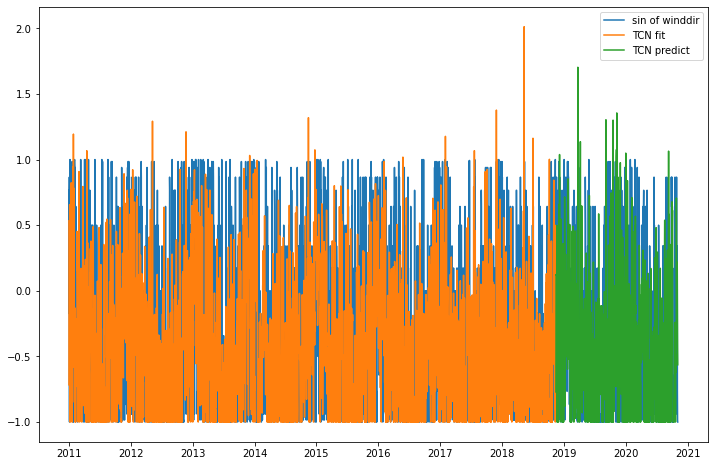

In [45]:
plt.figure(figsize=(12, 8))
plt.plot(winddir.Datetime, sindata, label='sin of winddir')
plt.plot(winddir.Datetime[:sep], sin_fit, label='TCN fit')
plt.plot(winddir.Datetime[sep:], sin_pre, label='TCN predict')
plt.legend()

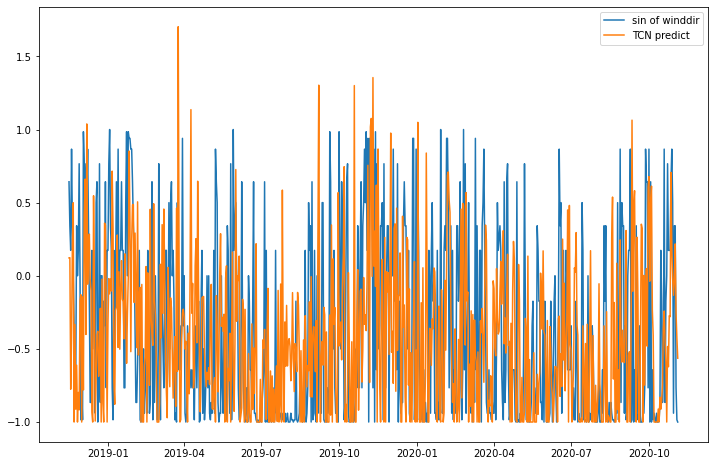

In [44]:
# 这个图只有预测的部分
plt.figure(figsize=(12, 8))
plt.plot(winddir.Datetime[sep:], sindata[sep:], label='sin of winddir')
# plt.plot(winddir.Datetime[:sep], sin_fit, label='TCN fit')
plt.plot(winddir.Datetime[sep:], sin_pre, label='TCN predict')
plt.legend()

# train, cos

In [32]:
train_X, train_label, test_X, test_label, scaler = get_datasetc()

In [33]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(window_size, 1)),
    TCN(nb_filters=filter_nums,     # 滤波器的个数，类比于units
        kernel_size=kernel_size,    # 卷积核的大小
        dilations=[1, 2, 4, 8]),    # 空洞因子
    keras.layers.Dense(units=1, activation='relu')
])
model.summary()
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

model.fit(train_X, train_label, validation_split=0.2, epochs=epochs)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
tcn_4 (TCN)                  (None, 10)                2940      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 2,951
Trainable params: 2,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
72/72 [==============================] - 1s 17ms/step - loss: 0.8202 - mse: 0.8202 - val_loss: 0.2214 - val_mse: 0.2214
Epoch 2/200
72/72 [==============================] - 1s 11ms/step - loss: 0.2013 - mse: 0.2013 - val_loss: 0.1773 - val_mse: 0.1773
Epoch 3/200
72/72 [==============================] - 1s 11ms/step - loss: 0.1639 - mse: 0.1639 - val_loss: 0.1426 - val_mse: 0.1426
Epoch 4/200
72/72 [==============================] - 1s 11ms/step - loss: 0.1379 - mse: 0.1379 - val_loss: 0.1199 - va

72/72 [==============================] - 1s 11ms/step - loss: 0.0685 - mse: 0.0685 - val_loss: 0.1227 - val_mse: 0.1227
Epoch 118/200
72/72 [==============================] - 1s 13ms/step - loss: 0.0683 - mse: 0.0683 - val_loss: 0.1185 - val_mse: 0.1185
Epoch 119/200
72/72 [==============================] - 1s 10ms/step - loss: 0.0668 - mse: 0.0668 - val_loss: 0.1195 - val_mse: 0.1195
Epoch 120/200
72/72 [==============================] - 1s 11ms/step - loss: 0.0665 - mse: 0.0665 - val_loss: 0.1197 - val_mse: 0.1197
Epoch 121/200
72/72 [==============================] - 1s 11ms/step - loss: 0.0656 - mse: 0.0656 - val_loss: 0.1194 - val_mse: 0.1194
Epoch 122/200
72/72 [==============================] - 1s 11ms/step - loss: 0.0680 - mse: 0.0680 - val_loss: 0.1296 - val_mse: 0.1296
Epoch 123/200
72/72 [==============================] - 1s 11ms/step - loss: 0.0672 - mse: 0.0672 - val_loss: 0.1208 - val_mse: 0.1208
Epoch 124/200
72/72 [==============================] - 1s 12ms/step - loss: 

In [34]:
model.evaluate(test_X, test_label)

fit = model.predict(train_X)

prediction = model.predict(test_X)
cos_pre = scaler.inverse_transform(prediction.reshape(-1, 1)).reshape(-1)
cos_fit = scaler.inverse_transform(fit.reshape(-1, 1)).reshape(-1)
# 反变换
print('mse of TCN: ', mean_squared_error(cos_pre, sindata[sep:]))
# 0.7473669100343316

23/23 [==============================] - 0s 12ms/step - loss: 0.1401 - mse: 0.1401
mse of TCN:  0.7473669100343316


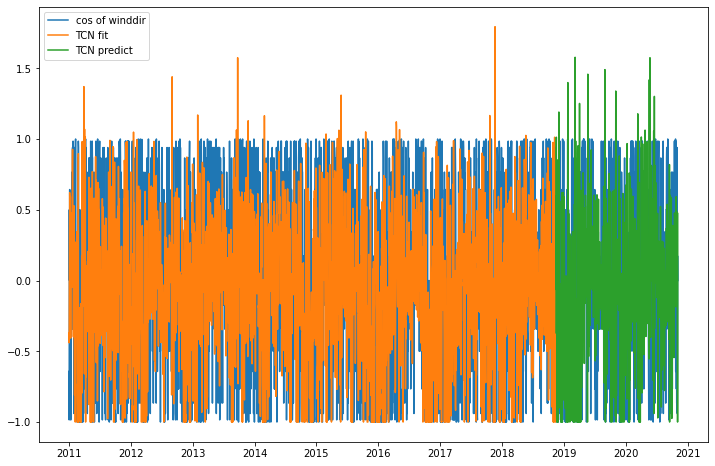

In [46]:
plt.figure(figsize=(12, 8))
plt.plot(winddir.Datetime, cosdata, label='cos of winddir')
plt.plot(winddir.Datetime[:sep], cos_fit, label='TCN fit')
plt.plot(winddir.Datetime[sep:], cos_pre, label='TCN predict')
plt.legend()

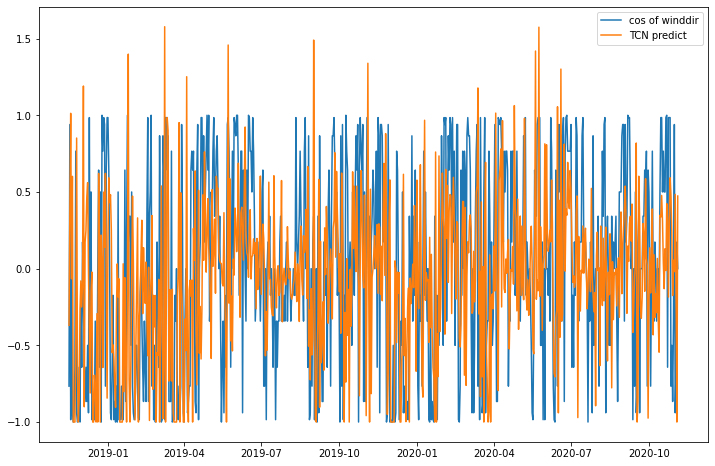

In [47]:
# 这个图只有预测的部分
plt.figure(figsize=(12, 8))
plt.plot(winddir.Datetime[sep:], cosdata[sep:], label='cos of winddir')
# plt.plot(winddir.Datetime[:sep], cos_fit, label='TCN fit')
plt.plot(winddir.Datetime[sep:], cos_pre, label='TCN predict')
plt.legend()

# 通过sin和cos还原角度

In [38]:
tcn_fit,tcn_pre=sin_fit.copy(),sin_pre.copy()
for i in range(len(tcn_fit)):
    tcn_fit[i]=todeg(sin_fit[i],cos_fit[i])
for i in range(len(tcn_pre)):
    tcn_pre[i]=todeg(sin_pre[i],cos_pre[i])

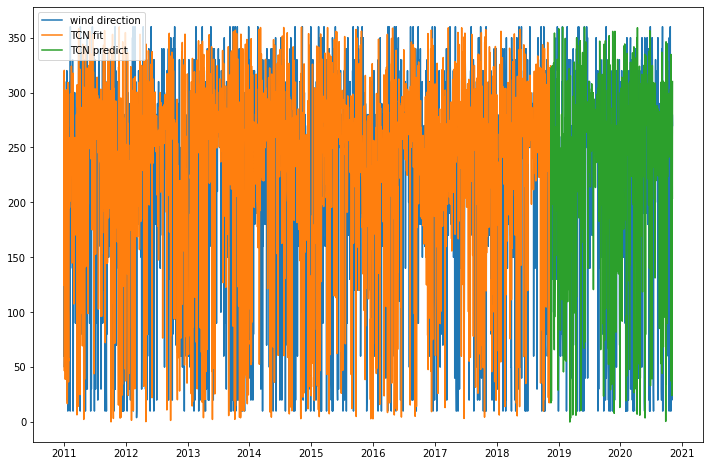

In [39]:
plt.figure(figsize=(12, 8))
plt.plot(winddir.Datetime, data, label='wind direction')
plt.plot(winddir.Datetime[:sep], tcn_fit, label='TCN fit')
plt.plot(winddir.Datetime[sep:], tcn_pre, label='TCN predict')
plt.legend()

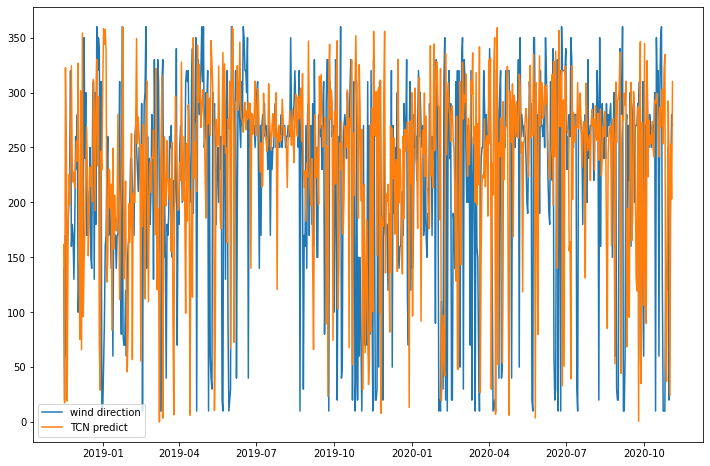

In [40]:
# 这个图只有预测的部分
plt.figure(figsize=(12, 8))
plt.plot(winddir.Datetime[sep:], data[sep:], label='wind direction')
# plt.plot(winddir.Datetime[:sep], tcn_fit, label='TCN fit')
plt.plot(winddir.Datetime[sep:], tcn_pre, label='TCN predict')
plt.legend()

In [42]:
# mean square error
mse = mean_squared_error(data[sep:],tcn_pre)
print("mse of TCN: ", mse)
# AR是13739.586889301867
# 15101.108089879854

mse of TCN:  15101.108089879854


In [43]:
pd.DataFrame(np.concatenate([tcn_fit,tcn_pre])).to_csv('result_TCN_winddir.csv',index = False)
# 预测的结果，有预测值和拟合值